# Demo 2: Plotting

In this demo we use a generic dimuon analysis example with 3 datasets - Data, Drell-Yan, and TTbar. Only events with exactly two opposite-sign muons are selected, some event selections are applied, and dimuon pairs are constructed. The data is provided in the Pandas DataFrames format.

In [1]:
from python.event_selection import load_events

sources = ["data", "ttbar", "dy"]
server = "file:/depot/cms/purdue-af/demos/"
dimuon_mass = {}

# Load datasets
for src in sources:
    df = load_events(f"{server}/{src}.root")
    dimuon_mass[src] = df["dimuon_mass"]

Below are three examples of plotting the dimuon mass distribution (event weights are not applied):

- `matplotlib`
- `scikit-hep/mplhep`
- `pyROOT`

### Plotting using Matplotlib

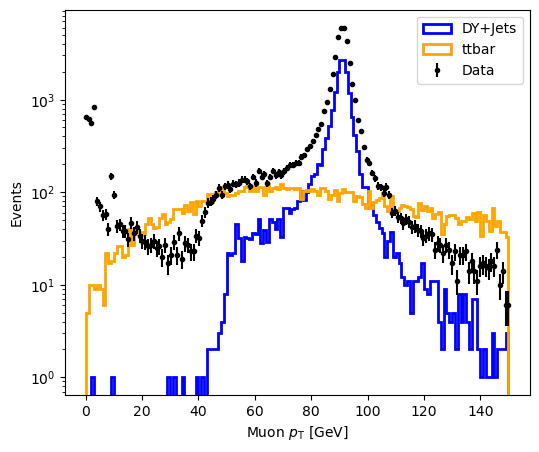

<Figure size 640x480 with 0 Axes>

In [2]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(6,5))

plt.hist(dimuon_mass["dy"], bins=150, range=(0, 150), histtype='step',linewidth=2, color='blue', label='DY+Jets')
plt.hist(dimuon_mass["ttbar"], bins=150, range=(0, 150), histtype='step',linewidth=2, color='orange', label='ttbar')
n, bins, patches = plt.hist(dimuon_mass["data"], bins=150, range=(0, 150), histtype='step',linewidth=0 )

errory = np.sqrt(n)
plt.errorbar(np.linspace(0,150,150), n,yerr= errory, fmt='o', markersize=3, color='k', label='Data')

plt.xlabel('Muon $p_{\mathrm{T}}$ [GeV]')
plt.ylabel('Events')
plt.yscale('log')
plt.legend()

#plt.savefig(f"muon_pt.pdf")
plt.show()
plt.clf()

### Plotting using `mplhep`

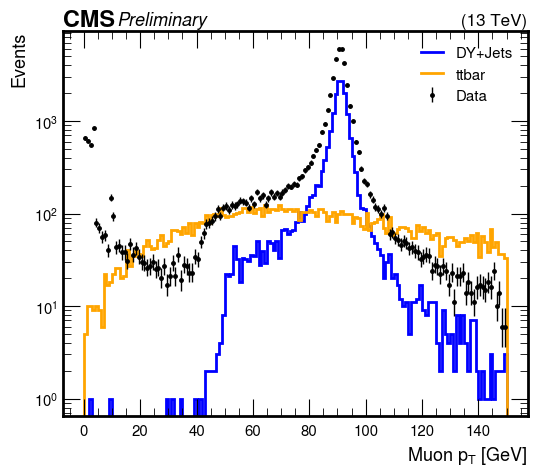

<Figure size 1000x1000 with 0 Axes>

In [3]:
import matplotlib.pyplot as plt
import mplhep as hep
import numpy as np

# CMS plot style
style = hep.style.CMS
#for key, value in style.items():
#    print(key, value)
style["font.size"] = 13
plt.style.use(style)

plt.figure(figsize=(6,5))

hists = {}
for src in ["dy", "ttbar", "data"]:
    hists[src], bins = np.histogram(dimuon_mass[src], bins=150, range=(0,150))

hep.histplot(hists["dy"], bins=bins, histtype='step',linewidth=2, color='blue', label='DY+Jets')
hep.histplot(hists["ttbar"], bins=bins, histtype='step',linewidth=2, color='orange', label='ttbar')
hep.histplot(hists["data"], bins=bins, histtype='errorbar',linewidth=0, markersize=5, color='black', label='Data')

# "CMS Preliminary"
hep.cms.label(loc=0, label="Preliminary", data=True)

plt.xlabel('Muon $p_{\mathrm{T}}$ [GeV]')
plt.ylabel('Events')
plt.yscale('log')
plt.legend()

#plt.savefig(f"muon_pt.pdf")
plt.show()
plt.clf()

### Plotting using pyROOT

cling::DynamicLibraryManager::loadLibrary(): libGL.so.1: cannot open shared object file: No such file or directory
Error in <AutoloadLibraryMU>: Failed to load library /depot/cms/kernels/python3/lib/libEve.so.6.28.00cling JIT session error: Failed to materialize symbols: { (main, { _ZeqRK7TStringRKNSt7__cxx1112basic_stringIcSt11char_traitsIcESaIcEEE }) }


Welcome to JupyROOT 6.28/00


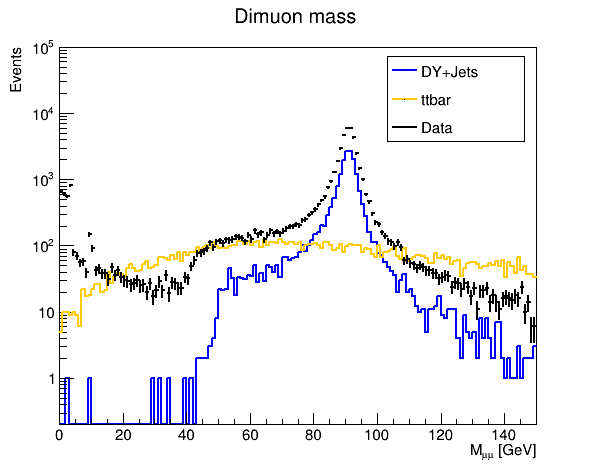

In [4]:
import ROOT

c1 = ROOT.TCanvas( 'c1', 'Dynamic Filling Example', 200, 10, 600, 500 )
c1.Clear()
c1.cd()

colors_ = {
    "dy": 600,
    "ttbar": 800,
    "data": 1
} 

h = {}
for src in ["dy", "ttbar", "data"]:
    h[src] = ROOT.TH1F("dimuon_mass_"+src,"Dimuon mass",150,0,150)
    for m in dimuon_mass[src]:
        h[src].Fill(m)
        h[src].SetLineColor(colors_[src])
        h[src].SetLineWidth(2)

c1.Clear()
c1.SetLogy()

h["dy"].Draw()
h["ttbar"].Draw('same')
h["data"].Draw('lep,same')

h["dy"].SetStats(0)
h["dy"].GetYaxis().SetRangeUser(0.2, 1e5)
h["dy"].GetYaxis().SetTitle("Events")
h["dy"].GetXaxis().SetTitle("M_{#mu#mu} [GeV]")

legend = ROOT.TLegend(0.65, 0.70, 0.88, 0.88)
legend.SetTextSize(0.035)
legend.AddEntry(h["dy"],"DY+Jets", "lp")
legend.AddEntry(h["ttbar"],"ttbar", "lp")
legend.AddEntry(h["data"],"Data", "lp")


legend.Draw()

c1.Modified()
c1.Update()

c1.Draw()